<a href="https://colab.research.google.com/github/deyaaa13/DataMining/blob/main/Pertemuan13_Clustering_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. import Library**

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
#make_circles dapat digunakan untuk menghasilkan data dalam bentuk circle

X, y = datasets.make_circles(n_samples = 500, noise=0.02, random_state=0)

In [ ]:
#menampilkan 5 data teratas
#X adalah data yang membentuk circle
print('Nilai X : \n', X[:5])

#sedangkan y adalah cluster dari data tersebut
print('\nCluster :\n', y[:5])

Nilai X : 
 [[-0.64935027  0.7694619 ]
 [ 0.75723522  0.08406494]
 [ 0.55074407  0.59177894]
 [ 0.14368733 -0.7838818 ]
 [ 0.45348142 -0.71992857]]

Cluster :
 [0 1 1 1 1]


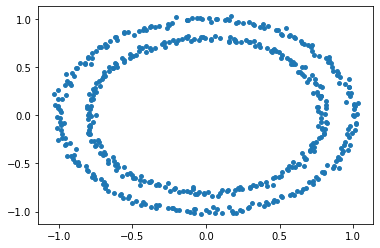

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

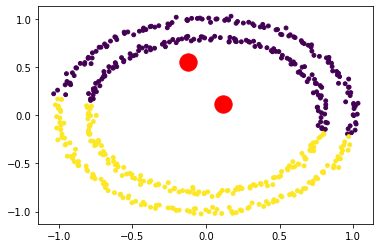

In [ ]:
kmeans_cluster =KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0],
            kmeans_cluster.cluster_centers_[:1],
            s=300, c='red')
plt.show()

In [ ]:
#create eps and min_samples combination
eps_values = np.arange(0.02, 0.3, 0.01)
min_samples = np.arange(2,5)
dbscan_params = list(product(eps_values, min_samples))

In [ ]:
#list contains looping result
no_of_clusters = []
epsvalues = []
min_samp = []

#iterate over parameter combinations
for p in dbscan_params:
  #create a dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  #no of cluster must be > 1, so if cluster <= 1 then break
  if len(np.unique(dbscan_cluster.labels_)) <= 1:
    break
  else:
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

    #append values to list
    epsvalues.append(p[0])
    min_samp.append(p[1])

In [ ]:
#create a dataframe based on the iteration results
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,
                          columns=['no_of_clusters',
                                   'epsilon_values', 'minimum_points'])
eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,99,0.02,2
1,23,0.02,3
2,2,0.02,4
3,141,0.03,2
4,64,0.03,3
5,16,0.03,4
6,110,0.04,2
7,84,0.04,3
8,58,0.04,4
9,57,0.05,2


In [ ]:
"""

karena tujuannya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari -
beberapa kombinasi parameter eps dan min_pts
"""

eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimum_points
2,2,0.02,4
18,2,0.08,2
19,2,0.08,3
20,2,0.08,4
21,2,0.09,2
22,2,0.09,3
23,2,0.09,4
24,2,0.10,2
25,2,0.10,3
26,2,0.10,4


# CREATE CLUSTER

kali ini menggunakamn nilai eps 0.8, min_samples = 2

---



In [ ]:
dbscan_cluster = DBSCAN(eps=0.08, min_samples=2)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

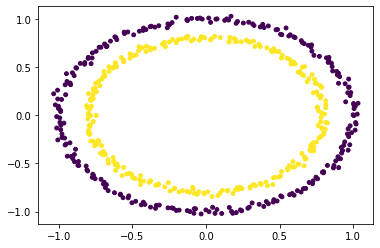

In [ ]:
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

# Cluster Evaluation

**Davies Bouldin Index(DBI)**

In [ ]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score:', dbi_kmeans)
print('DBI DBSCAN Score:', dbi_dbscan)

DBI KMeans Score: 1.1413660912854755
DBI DBSCAN Score: 690.8008186438688


**Silhouette Score**

In [ ]:
sil_kmeans = davies_bouldin_score(X, kmeans_result)
sil_dbscan = davies_bouldin_score(X, dbscan_result)

print('Silhouette Score KMeans Score:', sil_kmeans)
print('Silhouette Score  DBSCAN Score:', sil_dbscan)

Silhouette Score KMeans Score: 1.1413660912854755
Silhouette Score  DBSCAN Score: 690.8008186438688


**Lebih bagus KMeans**

# Generate Data

In [ ]:
X, y = datasets.make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=0)

# EDA

In [ ]:
#menampilkan 5 data teratas
#X adalah data yang membentuk circle
print('Nilai X : \n', X[:5])

#sedangkan y adalah cluster dari data tersebut
print('\nCluster :\n', y[:5])

Nilai X : 
 [[2.46023257 1.14242178]
 [3.66800921 0.15565258]
 [1.00830104 4.17275863]
 [0.16694238 4.850626  ]
 [1.14069873 2.05835514]]

Cluster :
 [1 1 0 0 1]
